In [1]:
import pandas as pd
import kaggle
import csv
import zipfile


In [2]:
!kaggle datasets download shahriar26s/anemia-detection-dataset -f anemia_dataset.csv

Dataset URL: https://www.kaggle.com/datasets/shahriar26s/anemia-detection-dataset
License(s): apache-2.0
anemia_dataset.csv: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
df = pd.read_csv("anemia_dataset.csv")

In [23]:
df.head(20)

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Munaf,45.0994,27.9645,26.9361,16.2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Nasima,43.1457,30.1628,26.6915,8.6,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Purnima,43.6103,29.1099,27.2798,10.3,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,rasheda,45.0423,29.1660,25.7918,13.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,rokeya,46.5143,27.4282,26.0575,9.7,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#seperate columns from one big string into unique columns
df = pd.read_csv('anemia_dataset.csv', delimiter=',')


In [27]:
#show new column names
print(df.columns.tolist())

['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [29]:
#read newly formatted csv, ensuring columns are seperated
df = pd.read_csv('anemia_dataset.csv', sep=',')


In [31]:
#get rid of null columns
df = df.drop(df.columns[7:14], axis = 1)

In [33]:
df.head(20)

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No
5,6,Munaf,45.0994,27.9645,26.9361,16.2,No
6,7,Nasima,43.1457,30.1628,26.6915,8.6,Yes
7,8,Purnima,43.6103,29.1099,27.2798,10.3,No
8,9,rasheda,45.0423,29.1660,25.7918,13.0,No
9,10,rokeya,46.5143,27.4282,26.0575,9.7,Yes


In [35]:
df = pd.get_dummies(df, columns=['Anaemic'], drop_first=True)


In [37]:
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic_Yes
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,True
1,2,khadiza,45.6033,28.1900,26.2067,13.5,False
2,3,Lalu,45.0107,28.9677,26.0215,11.7,False
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,False
4,5,monoara,43.2870,30.6972,26.0158,12.4,False


In [41]:
df = df.rename(columns={'Anaemic_Yes': 'Anaemic'})

In [43]:
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,True
1,2,khadiza,45.6033,28.1900,26.2067,13.5,False
2,3,Lalu,45.0107,28.9677,26.0215,11.7,False
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,False
4,5,monoara,43.2870,30.6972,26.0158,12.4,False


In [45]:
print(df.dtypes)

Number            int64
Name             object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic            bool
dtype: object


In [51]:
df.to_csv('anemia_dataset.csv', index=False)


In [53]:
test_df = pd.read_csv('anemia_dataset.csv')
print(test_df.head())

   Number        Name  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0       1  Jafor Alam     43.2555       30.8421      25.9025   6.3     True
1       2     khadiza     45.6033       28.1900      26.2067  13.5    False
2       3        Lalu     45.0107       28.9677      26.0215  11.7    False
3       4   Mira nath     44.5398       28.9899      26.4703  13.5    False
4       5     monoara     43.2870       30.6972      26.0158  12.4    False


In [55]:
import matplotlib.pyplot as plt

In [57]:
import numpy as np

In [59]:
import seaborn as sns

In [65]:
corr_columns = ['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic']
corr_data = df[corr_columns]

In [67]:
corr_matrix = corr_data.corr()

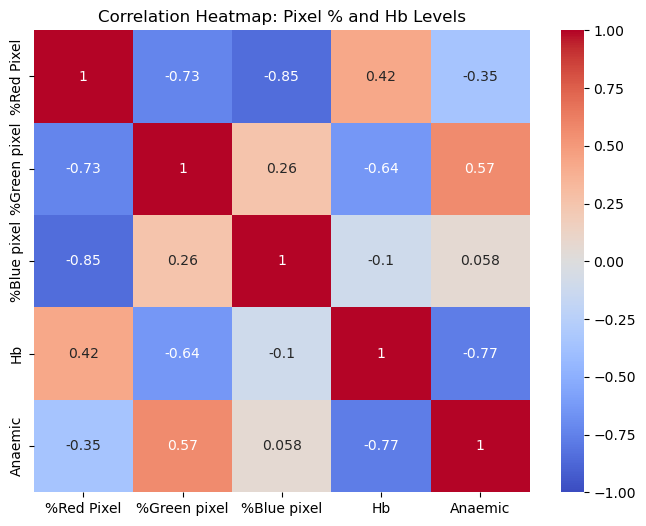

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Pixel % and Hb Levels')
plt.savefig('correlation_heatmap1.png', dpi=300, bbox_inches='tight')
plt.show()